In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import datetime as dt
import csv

In [6]:
def plot_data(data, category): 
    fig, ax = plt.subplots()
    
    plt.xlabel("Date")
    plt.xticks(fontsize=7)
    ax.set_xlim([dt.date(2021,1,15),dt.date.today()])
    start, end = ax.get_xlim()
    padding = (end-start)/20
    ax.xaxis.set_ticks(np.arange(start, end+padding, (end-start+padding)/13))
    fig.autofmt_xdate()

    plt.ylabel(category)
    plt.yticks(fontsize=7)
    ax.set_ylim([min(data[category]),max(data[category])])
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start-1,end+1,(end-start+2)/13))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    plt.plot(data["Date"], data[category], color='red', marker='o', markersize=4)
    plt.title(category + " vs. Time")
    plt.show()

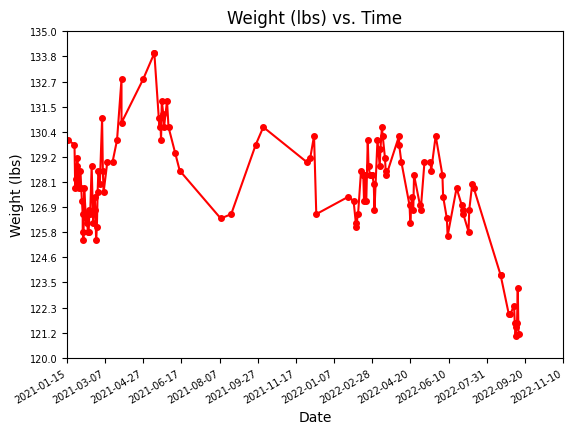

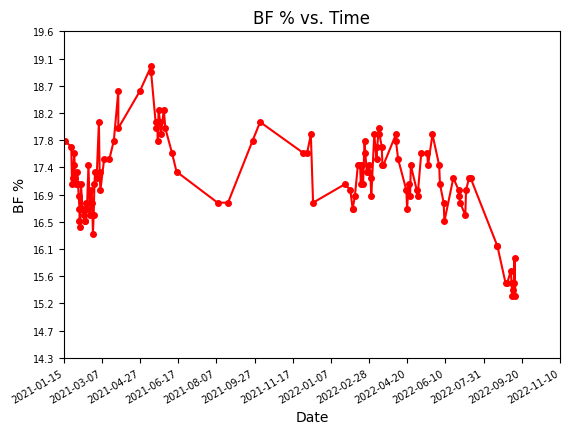

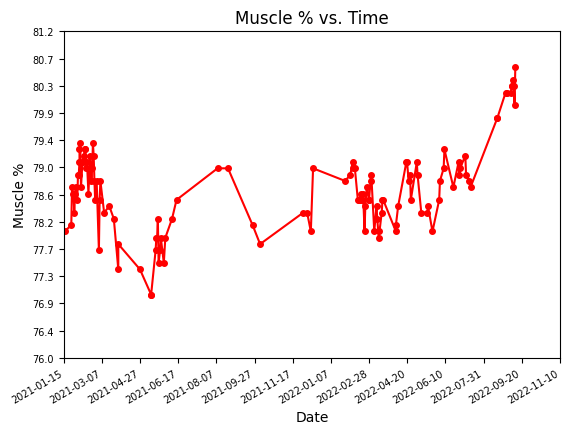

In [7]:
#['DateTime', 'Date', 'Time', 'Weight', 'BMI', 'BF%', 'FFBW', 'Subcut%', 'Visceral', 
# 'Water%', 'Skeletal%', 'MuscleMass', 'Muscle%', 'BoneMass', 'Protein%', 'BMR', 'Age']
headers = []
data = {}
entries = list(csv.reader(open('data2.csv', 'r'), delimiter=','))
headers = entries.pop(0)
NUM_H = len(headers)
NUM_E = len(entries)

for i in headers:
    data[i] = []
for i in range(NUM_E):
    for j in range(NUM_H):
        if j > 2: data[headers[j]].append(float(entries[i][j]))
        else: data[headers[j]].append(entries[i][j])

for i in range(NUM_E):
    date = data["Date"][i].split('/')
    time = data["Time"][i].split(':')
    data["DateTime"][i] = dt.datetime(int(date[2]), int(date[0]), int(date[1]), int(time[0]), int(time[1]), int(time[2]))
    data["Date"][i] = dt.date(int(date[2]), int(date[0]), int(date[1]))
    
for i in [3, 5, 12]:
    plot_data(data, headers[i])

In [17]:
def format_data():
    headers = []
    data = {}
    entries = list(csv.reader(open('Oct10_Data.csv', 'r'), delimiter=','))
    
    #DateTime = idx 0
    #Weight = idx 1
    #BF% = idx 2
    #Muscle Mass = idx 9
    #Muscle Percentage = muscle mass / weight
    headers = ["DateTime", "Weight", "BF", "MM"]
    idxs = [0, 1, 2, 9]
    NUM_E = len(entries)
    
    for x in headers:
        data[x] = []

    #Read in raw data
    for i in range(NUM_E):
        for idx,val in enumerate(headers):
            data[val].append(entries[i][idxs[idx]])

    data["Date"] = []
    data["Time"] = []
    
    for i in range(NUM_E):
        date = data["Date"][i].split('/')
        time = data["Time"][i].split(':')
        data["DateTime"][i] = dt.datetime(int(date[2]), int(date[0]), int(date[1]), int(time[0]), int(time[1]), int(time[2]))
        data["Date"][i] = dt.date(int(date[2]), int(date[0]), int(date[1]))

    for i in [3, 5, 12]:
        plot_data(data, headers[i])
    print("no errors lol")
format_data()

KeyError: 'Date'